<a href="https://colab.research.google.com/github/maheswari-f74/augumented-img-/blob/main/augumented_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array



In [ ]:
img_path = '/content/tiger.jfif'
img = load_img(img_path)

In [ ]:
img_array = img_to_array(img)

In [ ]:
img_array = img_array.reshape((1,)+img_array.shape)

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
augumented_images = datagen.flow(img_array, batch_size=1)

In [ ]:
def visualize_augumented_images(generator,num_images):
  fig,axes = plt.subplots(1,num_images,figsize=(20,20))
  for i in range(num_images):
    batch = next(generator)
    augumented_image = batch[0]
    axes[i].imshow(augumented_image)
    axes[i].axis('off')
  plt.show()

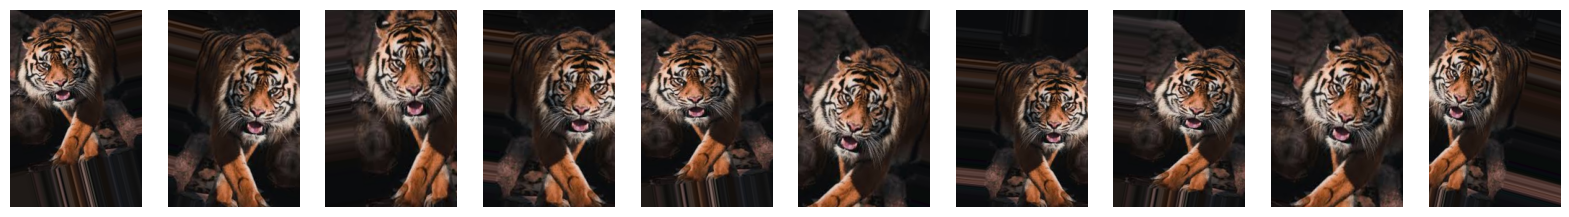

In [ ]:
visualize_augumented_images(augumented_images,10)

In [56]:
augumented_images = datagen.flow(img_array, batch_size=1)

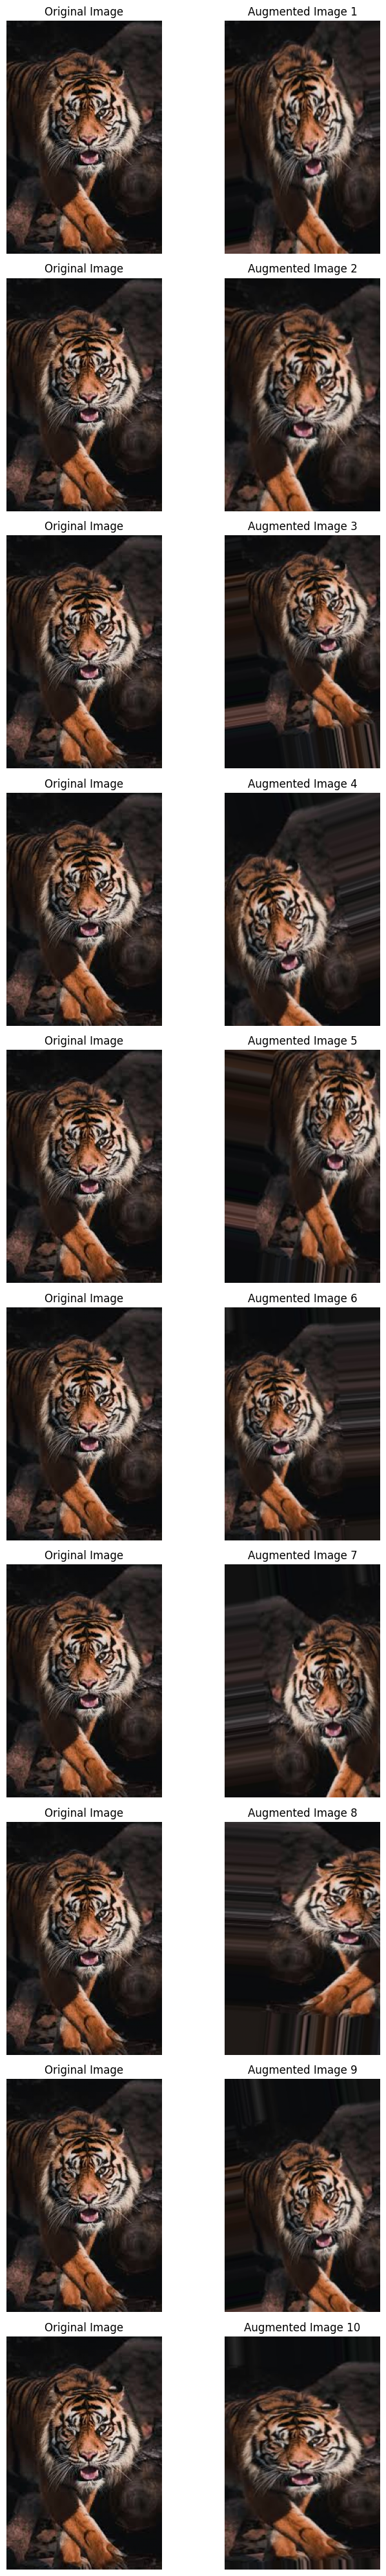

In [61]:
def visualize_original_and_augmented(original_img, generator, num_images):
    fig, axes = plt.subplots(num_images, 2, figsize=(8, 4 * num_images))

    # Ensure original is rescaled like augmented images
    original_rescaled = np.array(original_img) / 255.0

    for i in range(num_images):
        aug_batch = next(generator)
        aug_image = aug_batch[0]

        # Column 0: Original image
        axes[i, 0].imshow(original_rescaled)
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis('off')

        # Column 1: Augmented image
        axes[i, 1].imshow(aug_image)
        axes[i, 1].set_title(f"Augmented Image {i+1}")
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

visualize_original_and_augmented(img, augmented_images, 10)